## 决策树
* 如何从数据中找出最佳节点和最佳分支？
* 如何让决策册数停止生长，防止过拟合？
## sklearn中的决策树：sklearn.tree
* tree.DecisionTreeClassifier   分类树
* tree.DecisionTreeRegreesor    回归树
* tree.export_graphviz        将生成的决策树导出为DOT格式，画图专用
* ...
## sklearn 建模的基本流程
* 实例化，建立评估模型对象(实例化时，需要使用参数)
* 通过模型接口训练模型
* 通过模型接口提取需要的信息

### 分类树与红酒数据集
#### 重要参数：criterion   -> 帮助找到最佳的分枝方法
* 为了要将表格转化成一棵树，决策树需要找出最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标叫做“不纯度”。通常来说，不纯度越低，决策树对训练集的拟合越好。
* 不纯度基于节点计算，树种的每个节点都会有一个不纯度，并且子节点的不纯度一定低于父节点的，也就是说，在同一颗决策树上，叶子节点的不纯度一定是最低的。
### Criterion 这个参数正式用来决定不纯度的计算方法的，有两个
* entropy，信息熵
* gini ，基尼系数
>信息熵对不纯度更加敏感，对不纯度的惩罚最强。

>实际应用中两个参数差不多，
>两个参数都可以试一下，哪个效果好用哪个

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
wine = load_wine()  # 红酒数据，是一个字典
# 每种红酒 共有13个特征，我们就需要根据这13个特征对红酒进行分类
pd.DataFrame(wine.data)  

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
wine.target # 返回的是数据集的标签（也就是属于哪种酒，这里面的酒一共分成三类:0 1 2）

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
wine.target.shape

(178,)

In [5]:
# 使用pandas 将数据和标签放在一个表中
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names# 数据集的特征名称，也就是评判红酒的一些指标
#['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names  # 标签名，也就是红酒的三个分类名称

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [156]:
# 将数据集分成训练集合测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size = 0.3) # 传入数据合标签，已经测试集占的比例

In [157]:
Xtrain.shape,Xtest.shape  # 训练集124个数据，测试集53个数据

((124, 13), (54, 13))

In [10]:
Xtrain  # 数据

array([[1.200e+01, 1.510e+00, 2.420e+00, ..., 1.050e+00, 2.650e+00,
        4.500e+02],
       [1.386e+01, 1.350e+00, 2.270e+00, ..., 1.010e+00, 3.550e+00,
        1.045e+03],
       [1.277e+01, 3.430e+00, 1.980e+00, ..., 7.000e-01, 2.120e+00,
        3.720e+02],
       ...,
       [1.182e+01, 1.720e+00, 1.880e+00, ..., 9.400e-01, 2.440e+00,
        4.150e+02],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.383e+01, 1.650e+00, 2.600e+00, ..., 1.240e+00, 3.370e+00,
        1.265e+03]])

In [11]:
Ytrain # 标签

array([1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2,
       0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0])

In [214]:
# 建模三部曲 : 实例化  -> 训练模型  -> 测试模型
clf = tree.DecisionTreeClassifier(criterion='entropy')  # 创建一个分类树实例
model = clf.fit(Xtrain,Ytrain)  # 使用数据训练模型
score = model.score(Xtest,Ytest)  #使用测试集给模型打分,返回预测的准确度,但是每次运行，分数都是不一样的，看下面random_state参数
print(score)

0.9814814814814815


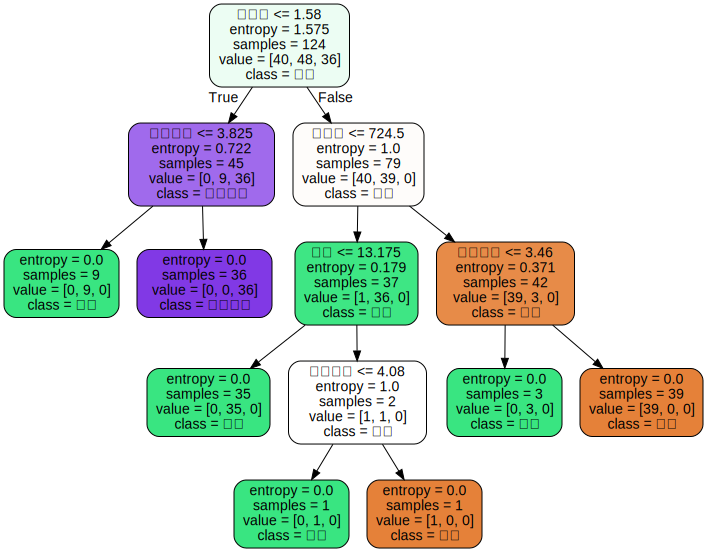

In [232]:
# 画决策树，需要配置一下 Graphviz 2.44.1，也可以使用matplotlib进行绘制

import graphviz
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(model
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"] # 标签 - 三种酒的名字(三个分类而已)
                                ,filled=True #填充颜色
                                ,rounded=True #显示圆角
)

graph = graphviz.Source(dot_data)
graph

In [15]:
## 可以发现一共有十三个特征，但是决策树并没有完全使用这13个特征，而是只使用了一部分
# 可以使用一个方法来查看特征对决策树的重要性
model.feature_importances_  # 被使用的特征，其重要性大于零

array([0.31538036, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43198537, 0.        , 0.        , 0.18775058,
       0.        , 0.        , 0.06488369])

In [17]:
[*zip(feature_name,model.feature_importances_)]  #更方便查看各个属性对决策树的影响（重要性）

[('酒精', 0.31538035754670146),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.43198537019438454),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.1877505800825544),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.06488369217635961)]

### random_state参数
* 在生成决策树的时候，算法不是使用所有的特征值的，而是随机选择一些特征，然后去生成最优的树
* 这将导致模型不稳定，可以使用random_state参数来让随机选择的特征值保持稳定

> random_state 

In [233]:
# 建模三部曲 : 实例化  -> 训练模型  -> 测试模型
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=30)  # 创建一个分类树实例
model = clf.fit(Xtrain,Ytrain)  # 使用数据训练模型
score = model.score(Xtest,Ytest)  #使用测试集给模型打分,返回预测的准确度,多次运行结果就是一样的了
print(score)

0.9814814814814815


> splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会
优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在
分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这
也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能
性。

In [315]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                ,random_state=20
                                ,splitter="random"
                                )
model = clf.fit(Xtrain, Ytrain)
score = model.score(Xtest, Ytest)
score

0.9814814814814815

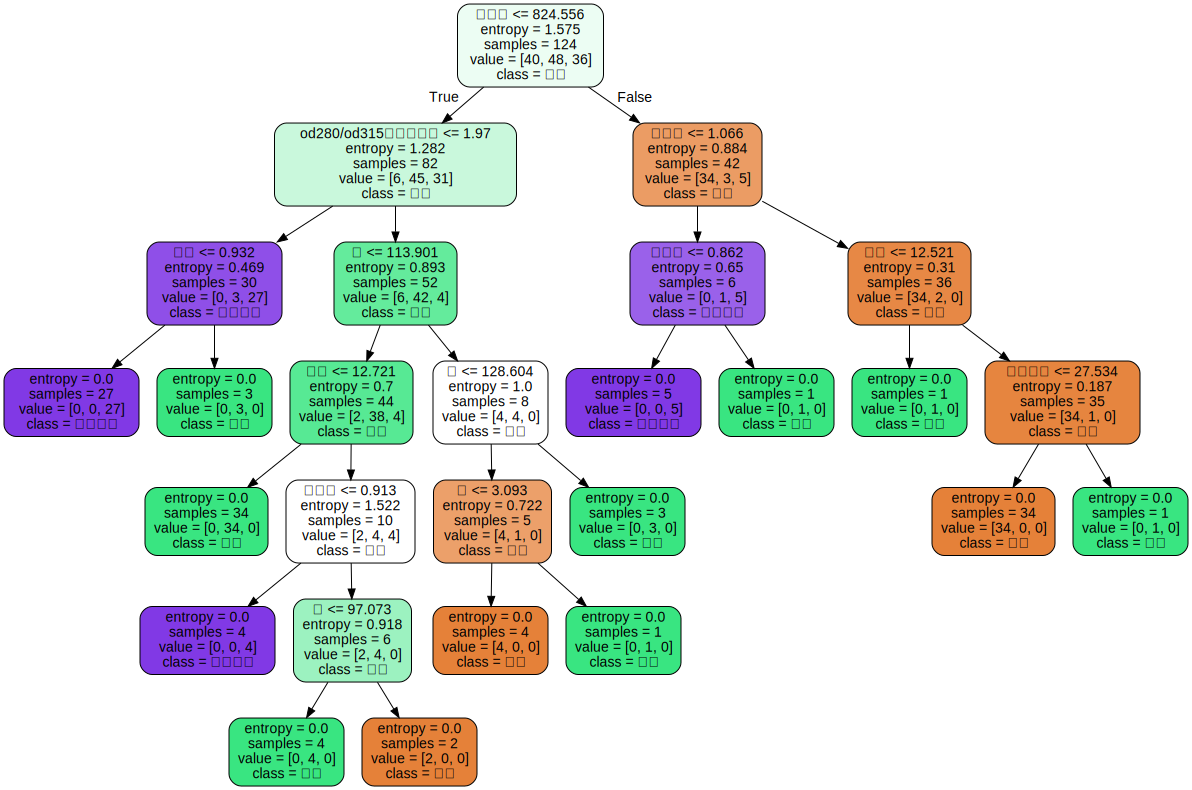

In [243]:
import graphviz
dot_data = tree.export_graphviz(model
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
)
graph = graphviz.Source(dot_data)
graph
# 会发现，树生长的深度明显加深

##  剪枝参数

In [244]:
#我们的树对训练集的拟合程度如何？
score_train = model.score(Xtrain, Ytrain)
score_train

1.0

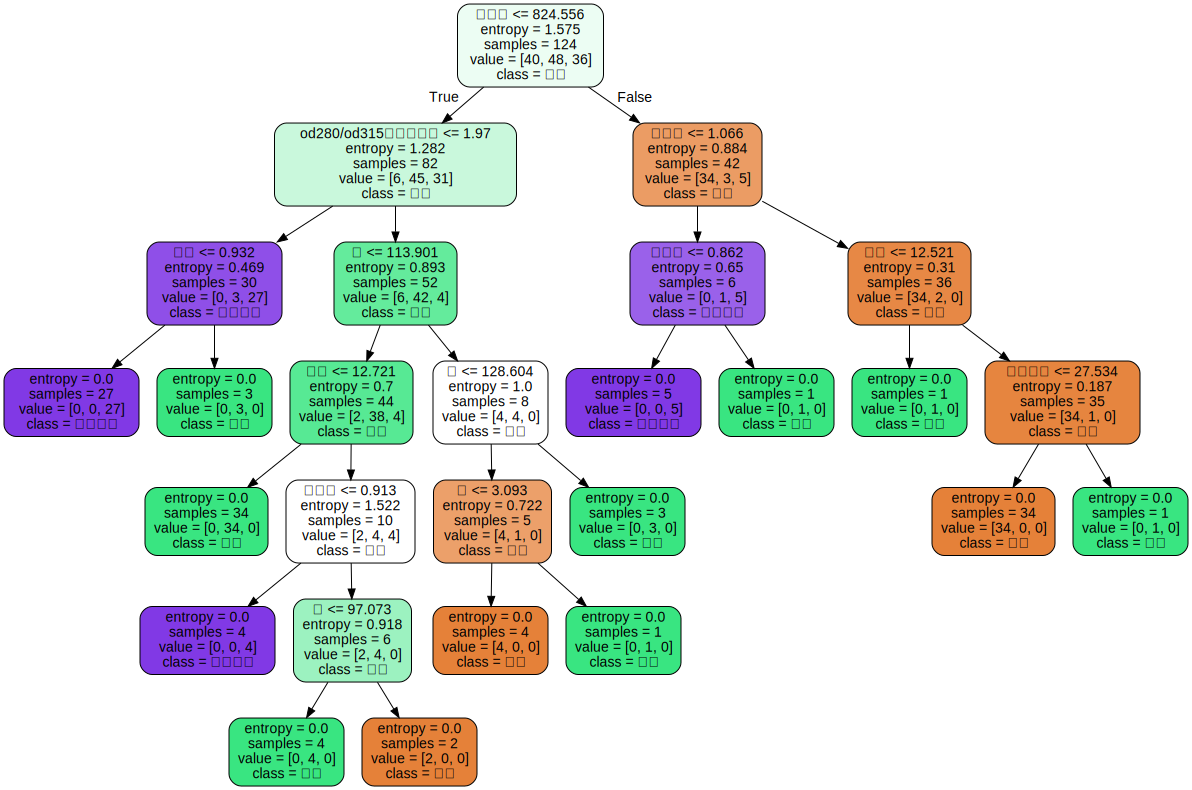

In [333]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                ,random_state=20
                                ,splitter="random"
                                #,max_depth=5
                                #,min_samples_leaf=10
                               #,min_samples_split=5
                                )
model = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(model
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [334]:
model.score(Xtest,Ytest)

0.9814814814814815

## 确认最优的剪枝参数
### 画matplotlib 图

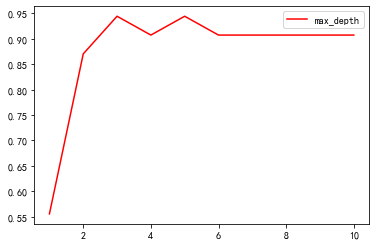

In [335]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    model = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()